# 2ª entrega Data Science

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
df= pd.DataFrame(pd.read_csv("train.csv"))

In [268]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [269]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
df.groupby('Store').mean()['Weekly_Sales']

### Exercício 1
Dado que o gráfico pretender apenas mostrar o valor médio vendido de cada loja, conclui-se que um simples gráfico de barras é o mais adequado para plotar.

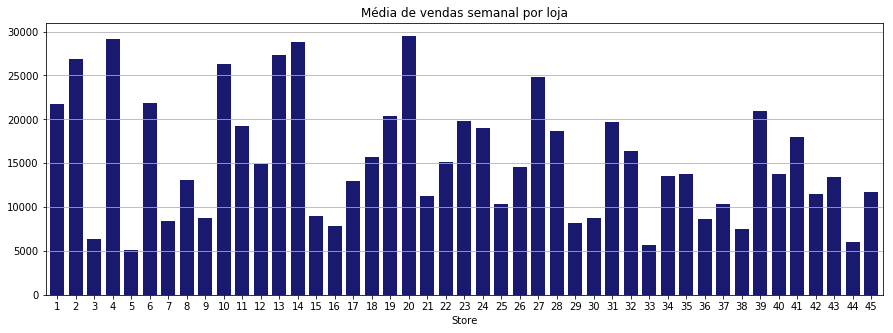

In [185]:
med = df.groupby('Store').mean()['Weekly_Sales'].plot(color='midnightblue',kind='bar',legend = False, width =0.75,figsize=(15,5),title='Média de vendas semanal por loja',rot=0)
med.grid(axis='y')

### Exercício 2

In [ ]:
df.groupby('Store').mean()['Weekly_Sales'].nlargest(10)

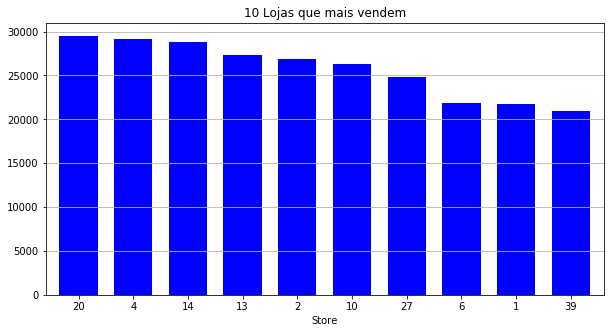

In [252]:
maisvendem = df.groupby('Store').mean()['Weekly_Sales'].nlargest(10).plot(width = 0.7,figsize=(10,5),color= 'blue',kind='bar', title = '10 Lojas que mais vendem',rot = 0)
maisvendem.grid(axis='y')

### Exercício 3

In [287]:
df.groupby('Store').mean()['Weekly_Sales'].nsmallest(10)

Store
30    8764.237719
36    8584.412563
7     8358.766148
29    8158.810609
16    7863.224124
38    7492.478460
3     6373.033983
44    6038.929814
33    5728.414053
5     5053.415813
Name: Weekly_Sales, dtype: float64

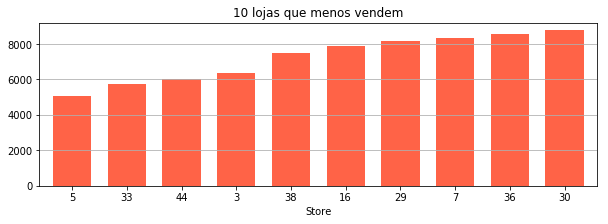

In [289]:
menosvendem = df.groupby('Store').mean()['Weekly_Sales'][::-1].nsmallest(10).plot(width = 0.7,figsize=(10,3),color ='tomato',kind='bar',title='10 lojas que menos vendem',rot=0)
menosvendem.grid(axis='y')

### Exercício 4

In [264]:
med_fer = df[df['IsHoliday']==True].groupby('Store').mean()['Weekly_Sales']
med_nfer = df[df['IsHoliday']==False].groupby('Store').mean()['Weekly_Sales']
index = df['Store'].unique()
compar = pd.DataFrame({'Com feriados':med_fer,'Sem feriados':med_nfer},index = index)

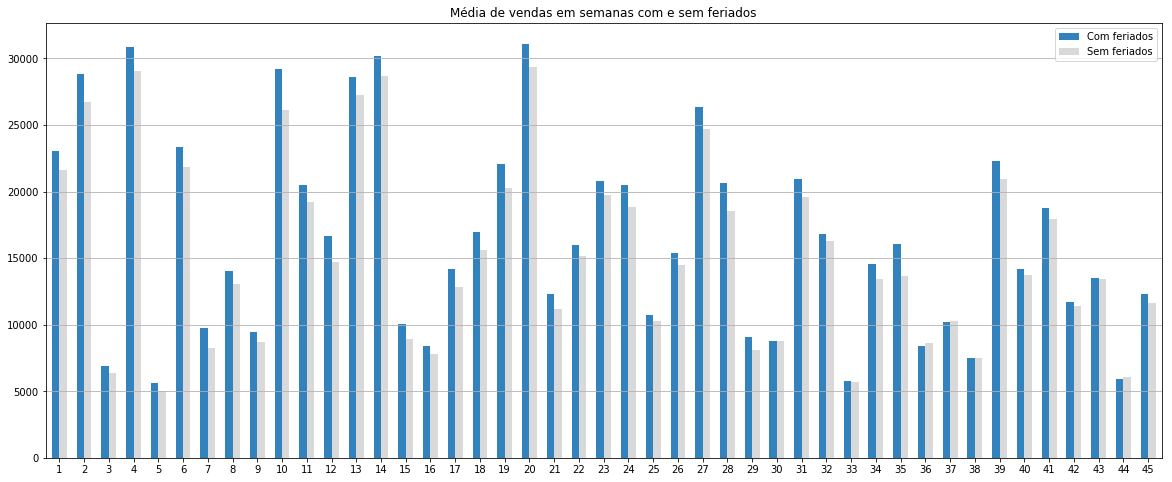

In [265]:
ax = compar.plot(cmap='tab20c',kind='bar', width =0.6,figsize=(20,8),title='Média de vendas em semanas com e sem feriados',rot=0)
ax.grid(axis='y')

In [266]:
median_fer = df[df['IsHoliday']==True].groupby('Store').median()['Weekly_Sales']
median_nfer = df[df['IsHoliday']==False].groupby('Store').median()['Weekly_Sales']
index2 = df['Store'].unique()
compar2 = pd.DataFrame({'Com feriados':median_fer,'Sem feriados':median_nfer},index = index)

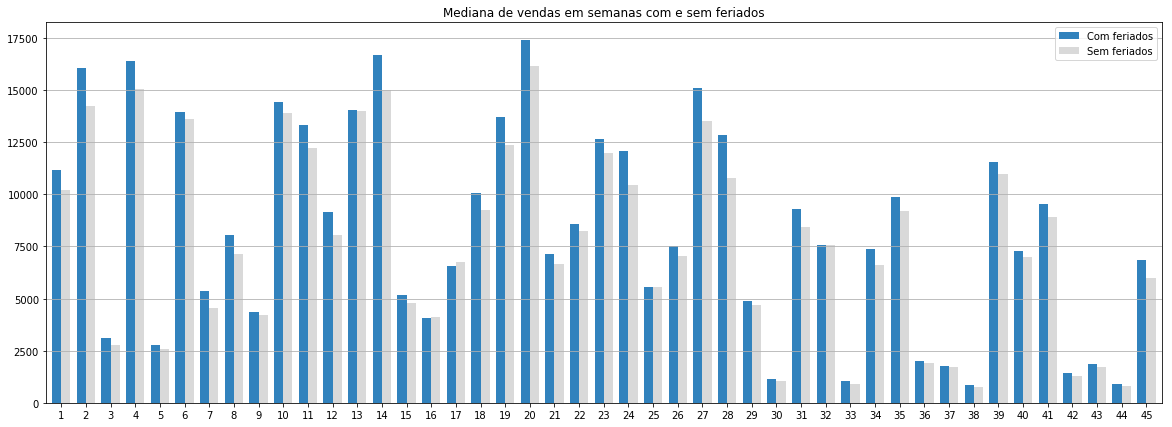

In [267]:
ax2= compar2.plot(cmap='tab20c',kind='bar', width =0.75,figsize=(20,7),title='Mediana de vendas em semanas com e sem feriados',rot=0)
ax2.grid(axis='y')

Nota-se que tanto na média quanto na mediana, o número de vendas aumenta quando a semana possui feriados, impactando-as então positivamente.